# IMAGE PREPROCESSING (IMAGE TRANSFORMATIONS AND FEATURE SELECTION)
Transformations:
a. Normalization (resize images to 512x512) 
Apply a Gaussian filter to the image to remove noise



Feature Selection:
a. Apply Cannny Edge Detection to the image

In [1]:
# IMPORT LIBRARIES
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## IMAGE TRANSFORMATIONS AND FEATURE SELECTION (TESTING)
In this part we'll be testing how the image transformations and feature selection work on the images. We'll be using the images from the training set.

Text(0.5, 1.0, 'Normal')

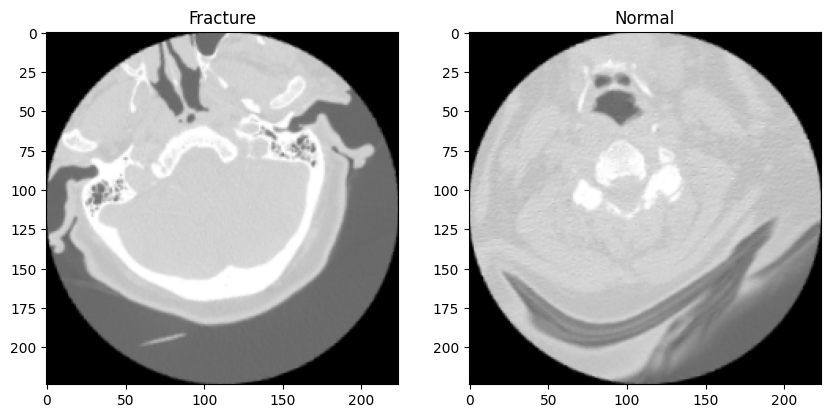

In [2]:
# TEST IMAGES

# Test image (frac)
test_frac = cv.imread("./CF_copy/train/fracture/train_frac_0.png")

# Test image (norm)
test_norm = cv.imread("./CF_copy/train/normal/train_norm_0.png")

# PLOT IMAGES (side-by-side)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(test_frac)
ax[0].set_title("Fracture")
ax[1].imshow(test_norm)
ax[1].set_title("Normal")


Text(0.5, 1.0, 'Normal')

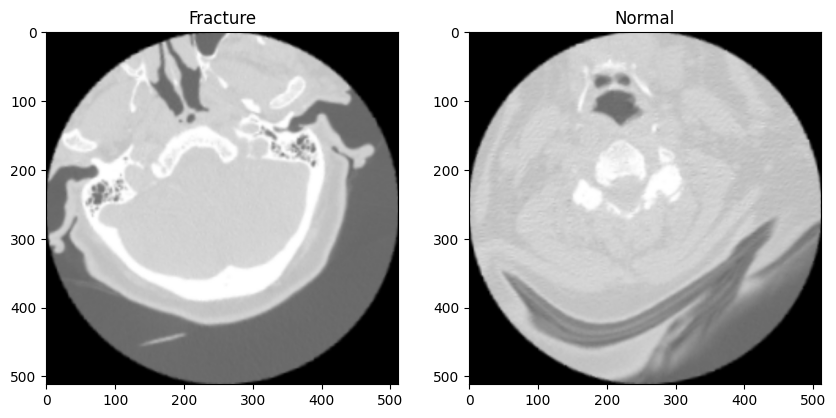

In [3]:
# Resize images

# Resize fracture image
if test_frac.shape[0] < 512:
    test_frac = cv.resize(test_frac, (512, 512))

# Resize normal image
if test_norm.shape[0] < 512:
    test_norm = cv.resize(test_norm, (512, 512))

# PLOT IMAGES (side-by-side)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(test_frac)
ax[0].set_title("Fracture")
ax[1].imshow(test_norm)
ax[1].set_title("Normal")


In [4]:
# Change images to grayscale

# Convert fracture image to grayscale
test_frac = cv.cvtColor(test_frac, cv.COLOR_BGR2GRAY)

# Convert normal image to grayscale
test_norm = cv.cvtColor(test_norm, cv.COLOR_BGR2GRAY)

### Apply Morphological Transformations to the image
a. Morphological Transformations: Erosion, Dilation, Opening, Closing, Gradient, Top Hat, Black Hat
Erosion - Erodes away the boundaries of foreground object (Always try smaller kernel sizes)
Dilation - Opposite of erosion. It increases the white region in the image or size of foreground object increases
Opening - Opening is just another name of erosion followed by dilation. It is useful in removing noise
Closing - Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.
Gradient - It is the difference between dilation and erosion of an image.
Top Hat - It is the difference between input image and Opening of the image.
Black Hat - It is the difference between the closing of the input image and input image.

In [5]:
# Function to get the image's 75th percentile
# This will be used to normalize the contrast of the images

def get_75th_percentile(image):
    # Get the 75th percentile of the image
    p75 = np.percentile(image, 75)
    return p75

# Test the function
get_75th_percentile(test_frac)

211.0

211.0
208.0


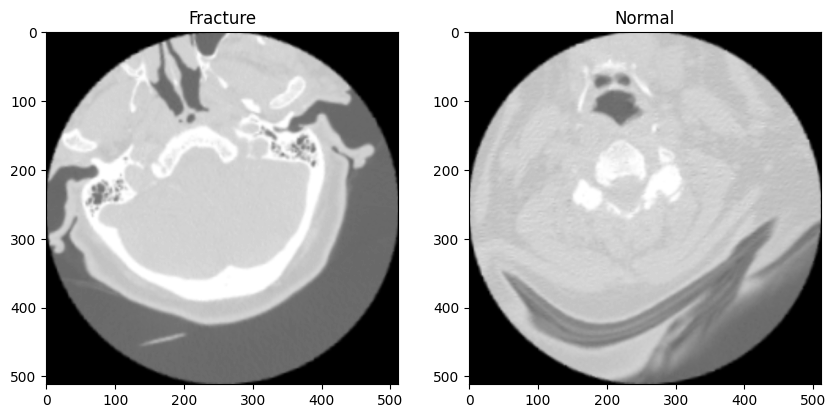

In [6]:
# TEST FOR EROSION
eroded_frac_75th = get_75th_percentile(test_frac)
eroded_norm_75th = get_75th_percentile(test_norm)
kernel = np.ones((1, 1), np.uint8)

# Intial erosion
test_frac_erode = cv.erode(test_frac, kernel, iterations=1)
test_norm_erode = cv.erode(test_norm, kernel, iterations=1)

# We need to make sure that the 75th percentile of the eroded image is greater than 200
while eroded_frac_75th < 200:
    # Erode the fracture image
    test_frac_erode = cv.erode(test_frac, kernel, iterations=1)
    eroded_frac_75th = get_75th_percentile(test_frac_erode)

while eroded_norm_75th < 200:
    # Erode the normal image
    test_norm_erode = cv.erode(test_norm, kernel, iterations=1)
    eroded_norm_75th = get_75th_percentile(test_norm_erode)

# PLOT IMAGES (side-by-side)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(test_frac_erode, cmap="gray")
ax[0].set_title("Fracture")
ax[1].imshow(test_norm_erode, cmap="gray")
ax[1].set_title("Normal")


# Calculate the 75th percentile of the eroded images
frac_erode_75th = get_75th_percentile(test_frac_erode)
norm_erode_75th = get_75th_percentile(test_norm_erode)

print(frac_erode_75th)
print(norm_erode_75th)

211.0
208.0


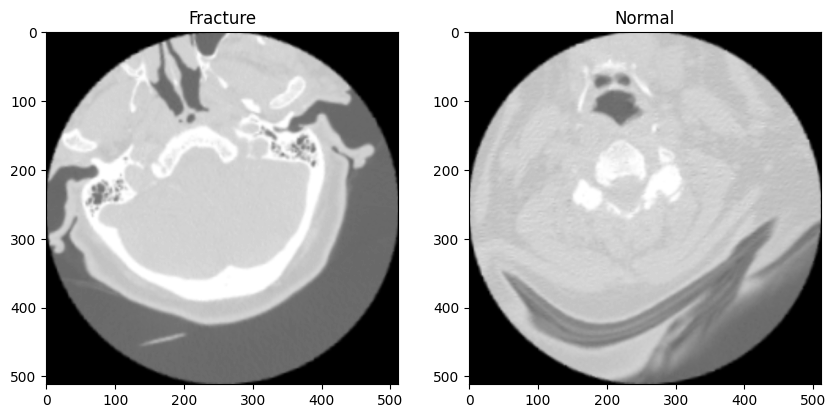

In [7]:
# Test for Opening (in the main tst images)

# Opening
kernel = np.ones((1,1), np.uint8)
test_frac_open = cv.morphologyEx(test_frac, cv.MORPH_OPEN, kernel)
test_norm_open = cv.morphologyEx(test_norm, cv.MORPH_OPEN, kernel)

# PLOT IMAGES (side-by-side)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(test_frac_open, cmap="gray")
ax[0].set_title("Fracture")
ax[1].imshow(test_norm_open, cmap="gray")
ax[1].set_title("Normal")

print(get_75th_percentile(test_frac_open))
print(get_75th_percentile(test_norm_open))

Text(0.5, 1.0, 'Normal')

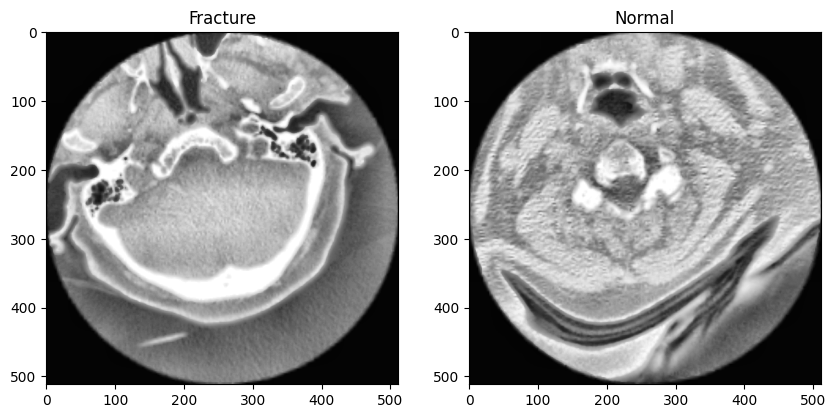

In [8]:
# Apply morphological transformations to enhance contrast

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
# clipLimit: threshold for contrast limiting, higher values give more contrast
# tileGridSize: size of grid for histogram equalization, higher values give more contrast
clahe = cv.createCLAHE(clipLimit=5, tileGridSize=(10, 10))

test_frac_clahe = clahe.apply(test_frac_erode)
test_norm_clahe = clahe.apply(test_norm_erode)


# PLOT IMAGES (side-by-side)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(test_frac_clahe, cmap="gray")
ax[0].set_title("Fracture")
ax[1].imshow(test_norm_clahe, cmap="gray")
ax[1].set_title("Normal")

Text(0.5, 1.0, 'Normal')

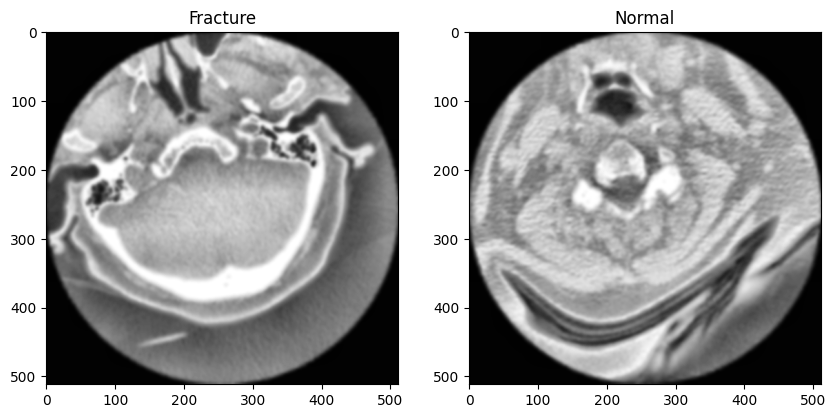

In [9]:
# Apply Gaussian blur to images
kernel = (9, 9)

# Apply Gaussian blur to fracture image
test_frac_gauss = cv.GaussianBlur(test_frac_clahe, kernel, 0)
# Apply Gaussian blur to normal image
test_norm_gauss = cv.GaussianBlur(test_norm_clahe, kernel, 0)

# PLOT IMAGES (side-by-side)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(test_frac_gauss, cmap="gray")
ax[0].set_title("Fracture")
ax[1].imshow(test_norm_gauss, cmap="gray")
ax[1].set_title("Normal")

Text(0.5, 1.0, 'Normal')

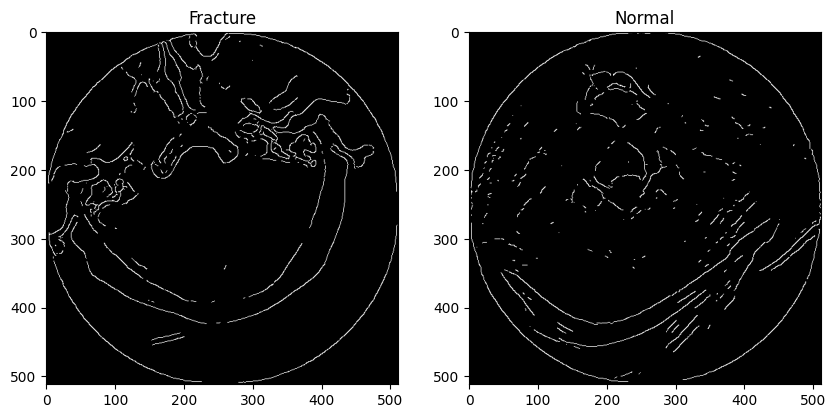

In [10]:
# Apply Canny Edge Detection to images
# Canny Edge Detection is a technique to extract useful structural information from different vision objects and dramatically reduce the amount of data to be processed.

# Apply Canny Edge Detection to fracture image
a, b = np.mean(test_frac_gauss), np.mean(test_frac_gauss)
test_frac_canny = cv.Canny(test_frac_gauss, a,b)
# Apply Canny Edge Detection to normal image
a,b = np.mean(test_norm_gauss), np.mean(test_norm_gauss)
test_norm_canny = cv.Canny(test_norm_gauss, a,b)

# PLOT IMAGES (side-by-side)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(test_frac_canny, cmap="gray")
ax[0].set_title("Fracture")
ax[1].imshow(test_norm_canny, cmap="gray")
ax[1].set_title("Normal")


## APPLY IMAGE TRANSFORMATIONS AND FEATURE SELECTION TO THE IMAGES

In [11]:
# FUNCTION TO PROCESS IMAGES